In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/proccessed.csv", index_col=0)
df.head()

,id,party_name,descriptions,gender,is_foreigner,location,descr_procc
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,554456,"['hasič', 'všeruby', '(domažlice)', 'ex-zastup..."
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,0,"['potravinářský', 'komora', 'český', 'republik..."
2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,0,"['umělec', 'dirigent']"
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,0,"['umělec', 'básnířka']"
4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,0,"['mluvčí', 'rožnov', 'radhoštěm', 'umělec', 'g..."


In [3]:
df.drop(columns=['party_name', 'location'], inplace=True)
df.head()

,id,descriptions,gender,is_foreigner,descr_procc
0,00000023-93ee-4754-a3c4-5748a4f420ad,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"['hasič', 'všeruby', '(domažlice)', 'ex-zastup..."
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,Potravinářská komora České republiky;lobby;mluvčí,2,2,"['potravinářský', 'komora', 'český', 'republik..."
2,00017467-20c1-4151-9126-088f9bff86e9,umělec;dirigent,1,2,"['umělec', 'dirigent']"
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,umělec;básnířka,2,2,"['umělec', 'básnířka']"
4,00040844-ca87-4a12-b394-eecd78a0166f,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,"['mluvčí', 'rožnov', 'radhoštěm', 'umělec', 'g..."


In [4]:
from src.utils import to_bag_of_words
bag_of_words = to_bag_of_words(df.descr_procc)
bag_of_words.head()

,aaa,aaabyty,aag,aakrchitektura,aalborg,aarhus,ab,abatyše,abb,abc,...,žďár,žďárce,žďárku,žďársko,žďársku,žďárský,žďáře,žš,žžm,ˇyďár
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from src.utils import string_to_list
df.descr_procc = df.descr_procc.apply(string_to_list)
df['desc_count_ori'] = df.descriptions.apply(lambda x: len(x.split(";")))
df.head()

,id,descriptions,gender,is_foreigner,descr_procc,desc_count_ori
0,00000023-93ee-4754-a3c4-5748a4f420ad,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"[hasič, všeruby, (domažlice), ex-zastupitel, o...",5
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,Potravinářská komora České republiky;lobby;mluvčí,2,2,"[potravinářský, komora, český, republika, lobb...",3
2,00017467-20c1-4151-9126-088f9bff86e9,umělec;dirigent,1,2,"[umělec, dirigent]",2
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,umělec;básnířka,2,2,"[umělec, básnířka]",2
4,00040844-ca87-4a12-b394-eecd78a0166f,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,"[mluvčí, rožnov, radhoštěm, umělec, grafička, ...",3


In [6]:
df['desc_count'] = df.descr_procc.apply(lambda x: len(x))
df.head()

,id,descriptions,gender,is_foreigner,descr_procc,desc_count_ori,desc_count
0,00000023-93ee-4754-a3c4-5748a4f420ad,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"[hasič, všeruby, (domažlice), ex-zastupitel, o...",5,10
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,Potravinářská komora České republiky;lobby;mluvčí,2,2,"[potravinářský, komora, český, republika, lobb...",3,6
2,00017467-20c1-4151-9126-088f9bff86e9,umělec;dirigent,1,2,"[umělec, dirigent]",2,2
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,umělec;básnířka,2,2,"[umělec, básnířka]",2,2
4,00040844-ca87-4a12-b394-eecd78a0166f,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,"[mluvčí, rožnov, radhoštěm, umělec, grafička, ...",3,6


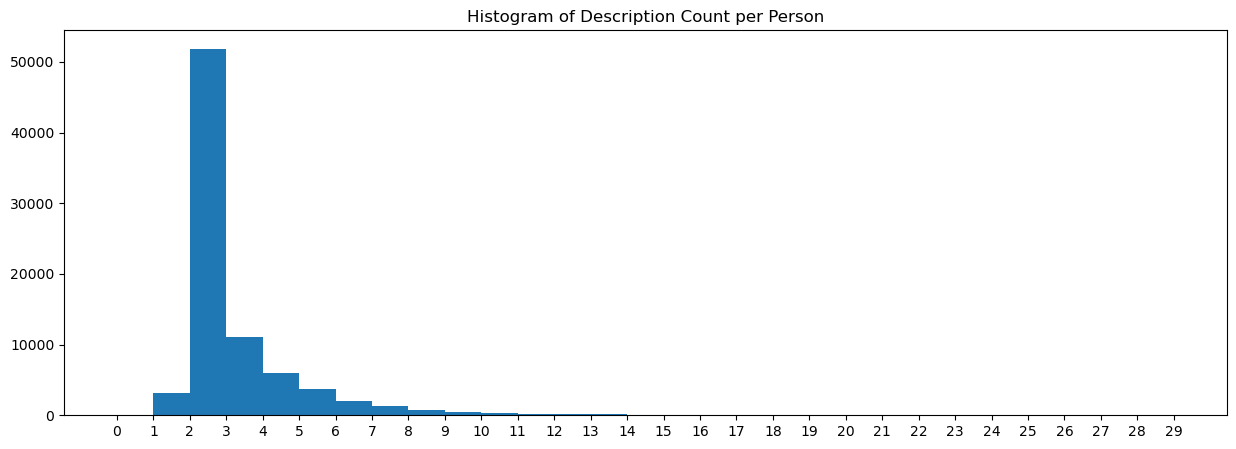

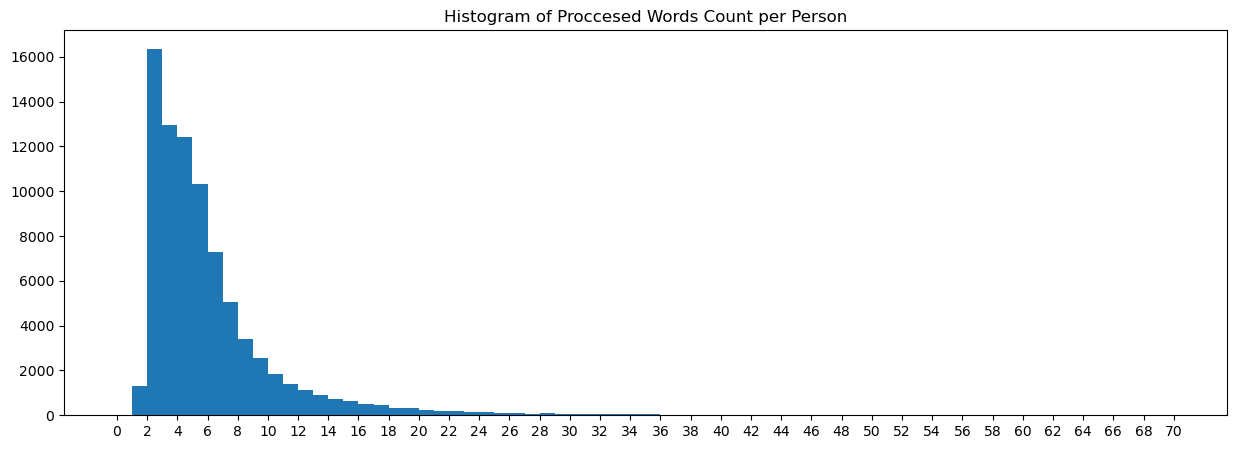

In [7]:
def histogram(column: pd.Series, title: str = ""):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.hist(column, bins=range(0, max(column) + 1))
    ax.set_xticks(range(0, max(column) + 1, int(max(max(column)/30, 1))))
    ax.set_title("Histogram of " + title)
    plt.show()
histogram(df.desc_count_ori, "Description Count per Person")
histogram(df.desc_count, "Proccesed Words Count per Person")

In [8]:
std = ['advokát', 'akademik', 'aktivista', 'blogger', 'byznys', 
'celebrita', 'církev', 'europol', 'komentátor', 'kontrolor', 
'kultura', 'léčitel', 'lobby', 'zdravotník', 'mluvčí', 'ngo', 
'novinář', 'odborník', 'odbory', 'ostatní', 'ombudsman', 
'ozbrojenec', 'politik', 'social', 'soudce', 'soudce_us', 
'spolek', 'sport', 'starosta', 'stát_byznys', 'ttank', 
'umělec', 'úředník', 'vyslanec', 'zaměstnavatel', 'zástupce', 
'záchranář', 'média', 'mezinárodní']


In [9]:
for label in std:
    df[label] = df.descr_procc.apply(lambda x: label in x)
df.head()

,id,descriptions,gender,is_foreigner,descr_procc,desc_count_ori,desc_count,advokát,akademik,aktivista,...,stát_byznys,ttank,umělec,úředník,vyslanec,zaměstnavatel,zástupce,záchranář,média,mezinárodní
0,00000023-93ee-4754-a3c4-5748a4f420ad,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"[hasič, všeruby, (domažlice), ex-zastupitel, o...",5,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,Potravinářská komora České republiky;lobby;mluvčí,2,2,"[potravinářský, komora, český, republika, lobb...",3,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,00017467-20c1-4151-9126-088f9bff86e9,umělec;dirigent,1,2,"[umělec, dirigent]",2,2,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,umělec;básnířka,2,2,"[umělec, básnířka]",2,2,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,00040844-ca87-4a12-b394-eecd78a0166f,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,"[mluvčí, rožnov, radhoštěm, umělec, grafička, ...",3,6,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [10]:
df.replace(to_replace={True:1, False:0}, inplace=True)
df.head()

,id,descriptions,gender,is_foreigner,descr_procc,desc_count_ori,desc_count,advokát,akademik,aktivista,...,stát_byznys,ttank,umělec,úředník,vyslanec,zaměstnavatel,zástupce,záchranář,média,mezinárodní
0,00000023-93ee-4754-a3c4-5748a4f420ad,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"[hasič, všeruby, (domažlice), ex-zastupitel, o...",5,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,Potravinářská komora České republiky;lobby;mluvčí,2,2,"[potravinářský, komora, český, republika, lobb...",3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00017467-20c1-4151-9126-088f9bff86e9,umělec;dirigent,1,2,"[umělec, dirigent]",2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,umělec;básnířka,2,2,"[umělec, básnířka]",2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,00040844-ca87-4a12-b394-eecd78a0166f,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,"[mluvčí, rožnov, radhoštěm, umělec, grafička, ...",3,6,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
df['is_labeled'] = df.descr_procc.apply(lambda x: len([i for i in x if i in std]) != 0)
df.head()

,id,descriptions,gender,is_foreigner,descr_procc,desc_count_ori,desc_count,advokát,akademik,aktivista,...,ttank,umělec,úředník,vyslanec,zaměstnavatel,zástupce,záchranář,média,mezinárodní,is_labeled
0,00000023-93ee-4754-a3c4-5748a4f420ad,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"[hasič, všeruby, (domažlice), ex-zastupitel, o...",5,10,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,Potravinářská komora České republiky;lobby;mluvčí,2,2,"[potravinářský, komora, český, republika, lobb...",3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,True
2,00017467-20c1-4151-9126-088f9bff86e9,umělec;dirigent,1,2,"[umělec, dirigent]",2,2,0,0,0,...,0,1,0,0,0,0,0,0,0,True
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,umělec;básnířka,2,2,"[umělec, básnířka]",2,2,0,0,0,...,0,1,0,0,0,0,0,0,0,True
4,00040844-ca87-4a12-b394-eecd78a0166f,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,"[mluvčí, rožnov, radhoštěm, umělec, grafička, ...",3,6,0,0,0,...,0,1,0,0,0,0,0,0,0,True


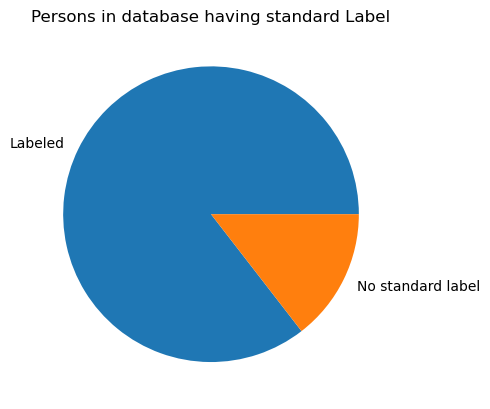

In [12]:
labels = 'Labeled', 'No standard label'
total_size = len(df.index)
labeled_size = df.is_labeled.sum()
unlabeled_size = total_size - labeled_size

sizes = [labeled_size/total_size, unlabeled_size/total_size]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title("Persons in database having standard Label")
plt.show()

In [13]:
unlabeled = df[df.is_labeled == False]
unlabeled.head()

,id,descriptions,gender,is_foreigner,descr_procc,desc_count_ori,desc_count,advokát,akademik,aktivista,...,ttank,umělec,úředník,vyslanec,zaměstnavatel,zástupce,záchranář,média,mezinárodní,is_labeled
0,00000023-93ee-4754-a3c4-5748a4f420ad,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,"[hasič, všeruby, (domažlice), ex-zastupitel, o...",5,10,0,0,0,...,0,0,0,0,0,0,0,0,0,False
20,001ed996-ecd8-4957-8723-b74f5667df44,REG_ZPR (#4624);deník Pravda,2,2,"[reg, zpr, deník, pravda]",2,4,0,0,0,...,0,0,0,0,0,0,0,0,0,False
47,003f23c9-213d-4fe7-8052-8a0bc6f81227,živnostník;kand_posl_2021,1,2,"[živnostník, kandidát, posl]",2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,False
53,0046f8d6-f3ae-40dc-9d87-631562565c27,"nvinář;publicistka, redaktorka Katolického týd...",2,2,"[nvinář, publicistka, redaktorka, katolický, t...",2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,False
62,0052ae07-d0c4-452f-8821-0551701c7364,"Postoloprty;vedoucí prodejny elektro, zastupit...",1,2,"[postoloprty, vedoucí, prodejna, elektro, zast...",5,14,0,0,0,...,0,0,0,0,0,0,0,0,0,False


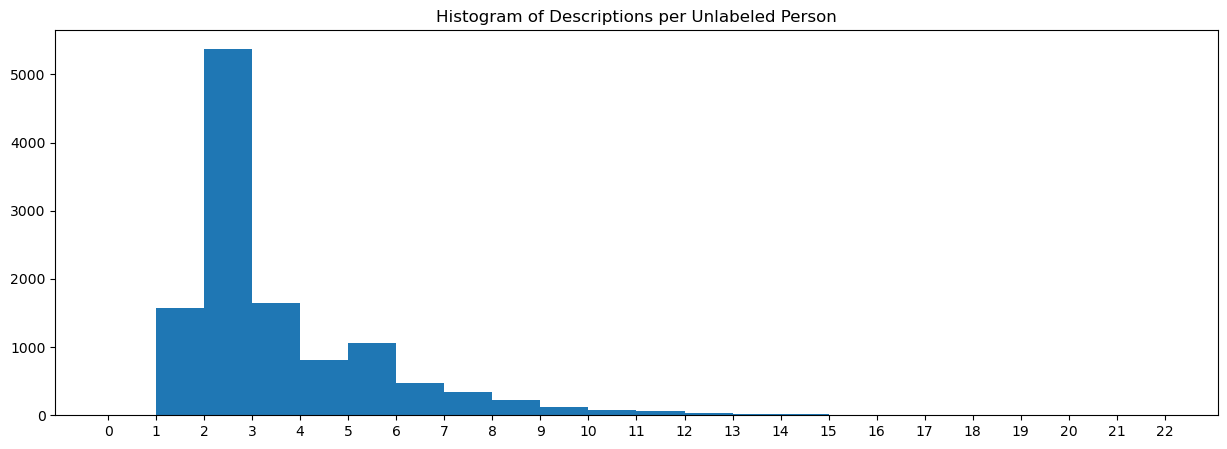

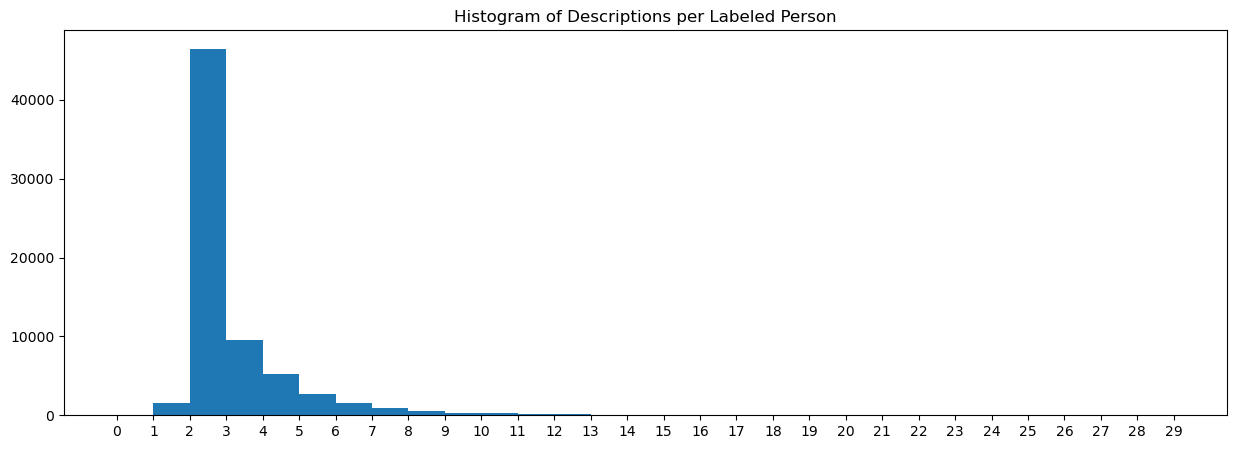

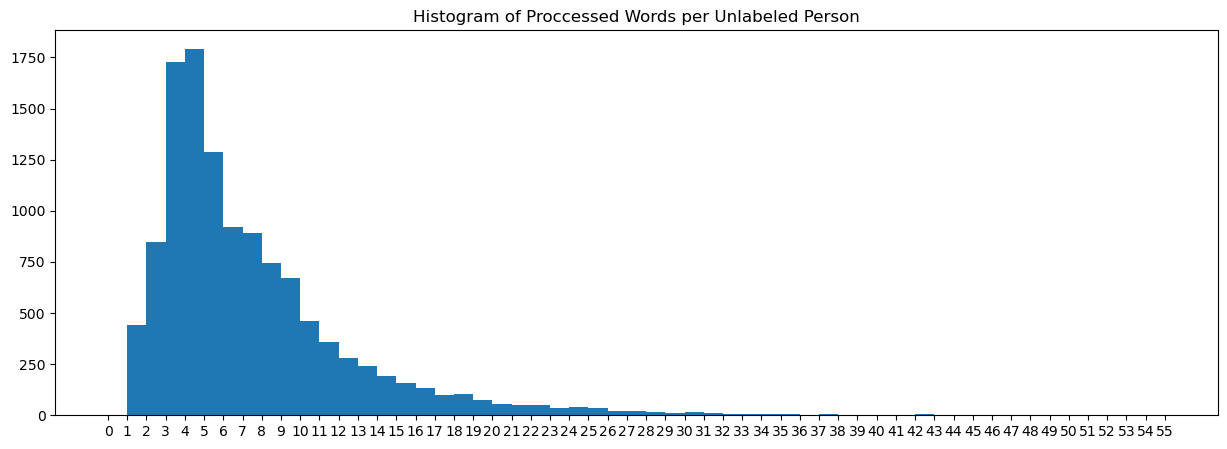

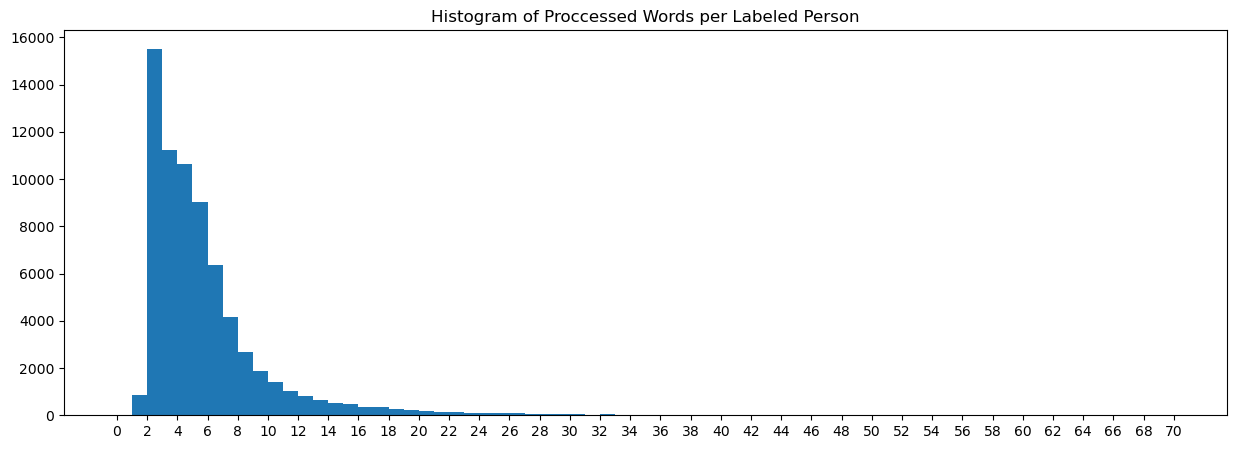

In [14]:
histogram(unlabeled.desc_count_ori, "Descriptions per Unlabeled Person")
histogram(df[df.is_labeled].desc_count_ori, "Descriptions per Labeled Person")
histogram(unlabeled.desc_count, "Proccessed Words per Unlabeled Person")
histogram(df[df.is_labeled].desc_count, "Proccessed Words per Labeled Person")

In [15]:
bag_of_words.sum().sort_values(ascending=False)

kandidát           16835
ex                 15818
odborník           11387
obec               11323
sport               9604
                   ...  
nanotoxikologie        1
nanotrade              1
nanovláken             1
nanter                 1
ˇyďár                  1
Length: 28012, dtype: int64

In [16]:
bag_of_words[df.is_labeled].sum().sort_values(ascending=False).head(30)

odborník      11387
sport          9603
umělec         8756
kultura        7329
ex             7244
byznys         7179
kandidát       6725
mluvčí         5710
ředitel        5517
reg            5255
zpr            5251
obec           5226
spolek         4671
starosta       4572
akademik       3734
zastupitel     3733
vedoucí        3644
zdravotník     3523
úředník        3357
novinář        3204
český          2674
ředitelka      2257
předseda       2166
social         1819
ido            1766
om             1765
ozbrojenec     1749
posl           1509
trenér         1492
čr             1485
dtype: int64

In [17]:
bag_of_words[~df.is_labeled].sum().sort_values(ascending=False).head(30)

kandidát         10110
ex                8574
obec              6097
zastupitel        5190
posl              4327
reg               2923
zpr               2922
místostarosta     1097
ředitel            870
město              817
kraj               782
starostka          659
krajský            622
ods                483
učitel             476
kdu                475
čsl                472
radní              452
předseda           444
vedoucí            409
čssd               407
manažer            367
český              361
náměstek           357
osvč               334
poslanec           329
podnikatel         310
obecní             307
ředitelka          306
technik            294
dtype: int64

In [20]:
bag_of_words[~df.is_labeled].sum()[bag_of_words[~df.is_labeled].sum() > 0].sort_values(ascending=False)

kandidát      10110
ex             8574
obec           6097
zastupitel     5190
posl           4327
              ...  
lčr               1
lüthi             1
lískovec          1
líbit             1
žďársku           1
Length: 7949, dtype: int64